In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Quality of Service 5G.csv')

In [8]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [10]:
df.isnull().sum()

,0
Timestamp,0
User_ID,0
Application_Type,0
Signal_Strength,0
Latency,0
Required_Bandwidth,0
Allocated_Bandwidth,0
Resource_Allocation,0


In [11]:
df.size

3200

In [12]:
df.shape

(400, 8)

In [19]:
df.nunique()

,0
Timestamp,7
User_ID,400
Application_Type,11
Signal_Strength,84
Latency,87
Required_Bandwidth,188
Allocated_Bandwidth,194
Resource_Allocation,9


In [20]:
# Check for Duplicates
df.duplicated().sum()

0

In [42]:
# Remove unwanted substr and convert df['Resource_Allocation'] to int dtype

df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%','').astype('int')

In [21]:
df['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [43]:
counts = df.groupby(['Application_Type', 'Resource_Allocation']).size().unstack()

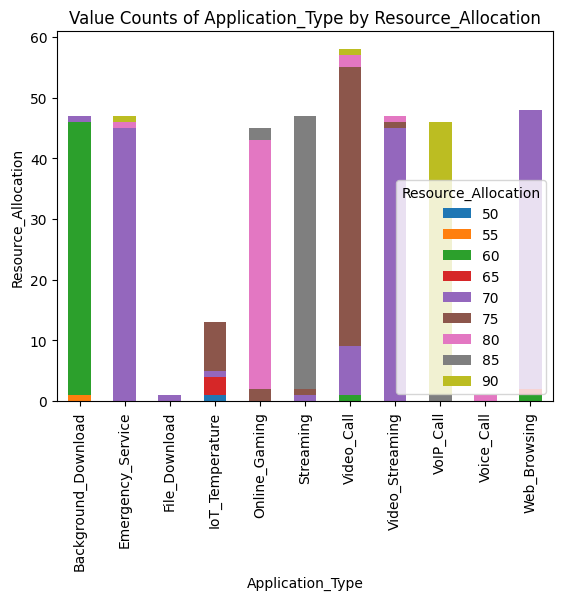

In [44]:
counts.plot(kind='bar', stacked=True)
plt.xlabel('Application_Type')
plt.ylabel('Resource_Allocation')
plt.title('Value Counts of Application_Type by Resource_Allocation')
plt.show()

In [45]:
# Find the application with the highest allocation
highest_allocation = df.loc[df['Resource_Allocation'].idxmax()]

print("Application with the highest resource allocation:")
print(highest_allocation[['Application_Type', 'Resource_Allocation']])

Application with the highest resource allocation:
Application_Type       Emergency_Service
Resource_Allocation                   90
Name: 3, dtype: object


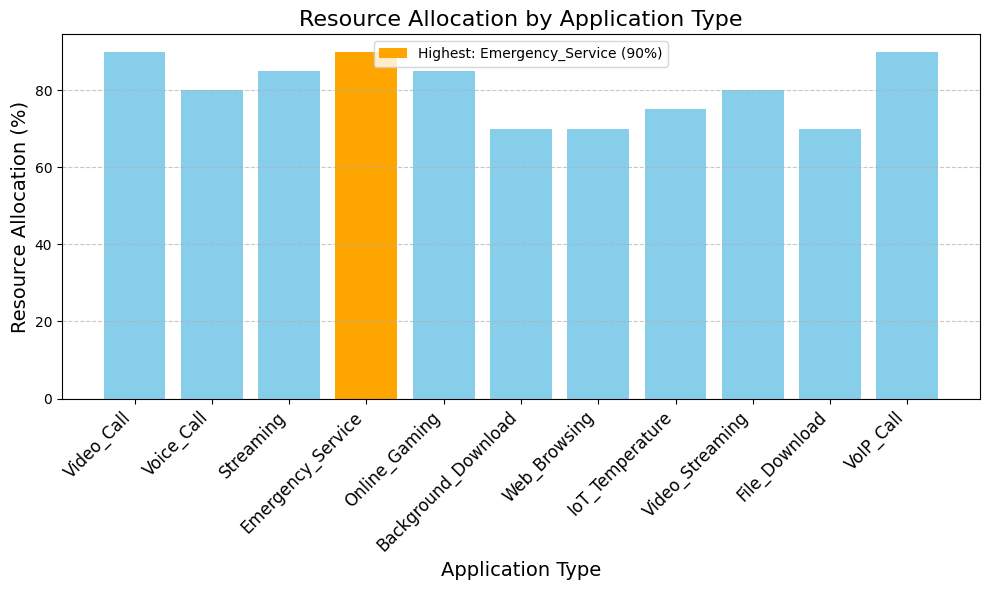

In [46]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Application_Type'], df['Resource_Allocation'], color='skyblue')
plt.title('Resource Allocation by Application Type', fontsize=16)
plt.xlabel('Application Type', fontsize=14)
plt.ylabel('Resource Allocation (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Highlight the highest allocation
max_allocation = df['Resource_Allocation'].max()
max_app = df.loc[df['Resource_Allocation'].idxmax(), 'Application_Type']
plt.bar(max_app, max_allocation, color='orange', label=f'Highest: {max_app} ({max_allocation}%)')
plt.legend()

# Show the plot
plt.show()

Contains the following unique values: ['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service', 'Online_Gaming', 'Background_Download', 'Web_Browsing', 'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call']

These all categories can be arranged in increasing Ordered form of Resource requirement:
* Background_Download
* Web_Browsing
* File_Download
* IoT_Temperature
* Video_Streaming
* Voice_Call
* Streaming
* Online_Gaming
* VoIP_Call
* Video_Call
* Emergency_Service

So, use Ordinal Encoding technique to transform the text data to numeric values.

In [49]:
from sklearn.preprocessing import OrdinalEncoder

# Arrange data in ordered categories
data = [['Background_Download','Web_Browsing', 'File_Download', 'IoT_Temperature', 'Video_Streaming', 'Voice_Call', 'Streaming', 'Online_Gaming', 'VoIP_Call', 'Video_Call', 'Emergency_Service']]

encoder = OrdinalEncoder(categories=data)

print(df['Application_Type'].unique())
df['Application_Type'] = encoder.fit_transform(np.array(df['Application_Type']).reshape(-1,1))
print(df['Application_Type'].unique())

['Video_Call' 'Voice_Call' 'Streaming' 'Emergency_Service' 'Online_Gaming'
 'Background_Download' 'Web_Browsing' 'IoT_Temperature' 'Video_Streaming'
 'File_Download' 'VoIP_Call']
[ 9.  5.  6. 10.  7.  0.  1.  3.  4.  2.  8.]


In [50]:
# Remove unwanted substr and convert df['User_ID'] to int dtype

df['User_ID'] = df['User_ID'].str.replace('User_','').astype('int')

In [51]:
# Bandwidth contains 2 units : Kbps and Mbps, where Kbps=1000*Mbps
# Mbps : Convert to Kbps
# Kbps : Leave as it is

def mbps_to_kbps(value):
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+' Kbps'
    else:
        return value


df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)

In [52]:
# Remove unwanted substr and convert df['Required_Bandwidth'] and
# df['Allocated_Bandwidth'] to int dtype

df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Kbps','').astype('float')
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Kbps','').astype('float')

In [53]:
# Remove unwanted substr and convert df['Latency'] to int dtype
df['Latency'] = df['Latency'].str.replace(' ms','').astype('int')

In [54]:
# Remove unwanted substr and convert df['Signal_Strength'] to int dtype
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm','').astype('int')

In [55]:
# Cast 'Timestamp' col dtype from object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int64         
 2   Application_Type     400 non-null    float64       
 3   Signal_Strength      400 non-null    int64         
 4   Latency              400 non-null    int64         
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    int64         
 8   resource             400 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 28.2+ KB


In [58]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,resource
0,2023-09-03 10:00:00,1,9.0,-75,30,10000.0,15000.0,70,[70]
1,2023-09-03 10:00:00,2,5.0,-80,20,100.0,120.0,80,[80]
2,2023-09-03 10:00:00,3,6.0,-85,40,5000.0,6000.0,75,[75]
3,2023-09-03 10:00:00,4,10.0,-70,10,1000.0,1500.0,90,[90]
4,2023-09-03 10:00:00,5,7.0,-78,25,2000.0,3000.0,85,[85]


In [69]:
df = df.drop('resource', axis =1)

In [60]:
df.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,2023-09-03 10:03:00,200.500000,5.597500,-80.495000,33.825000,3135.512500,3502.38000,74.712500
min,2023-09-03 10:00:00,1.000000,0.000000,-123.000000,0.000000,0.000000,0.00000,50.000000
25%,2023-09-03 10:01:00,100.750000,3.000000,-98.000000,21.750000,417.500000,417.50000,70.000000
50%,2023-09-03 10:03:00,200.500000,6.000000,-83.000000,31.000000,1200.000000,1350.00000,70.000000
75%,2023-09-03 10:05:00,300.250000,9.000000,-64.000000,45.000000,4100.000000,4425.00000,80.000000
max,2023-09-03 10:06:00,400.000000,10.000000,-40.000000,110.000000,14500.000000,15800.00000,90.000000
std,NaN,115.614301,3.414622,20.701119,21.122139,3984.096715,4460.80117,8.982291


<Axes: xlabel='Resource_Allocation', ylabel='count'>

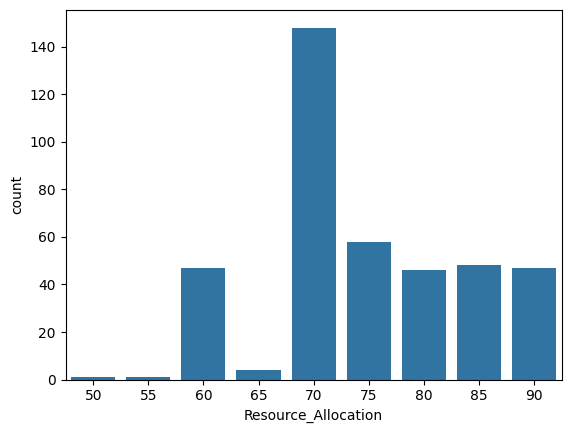

In [61]:
# Find count of values in target variable
sns.countplot(x=df['Resource_Allocation'])

<Axes: ylabel='count'>

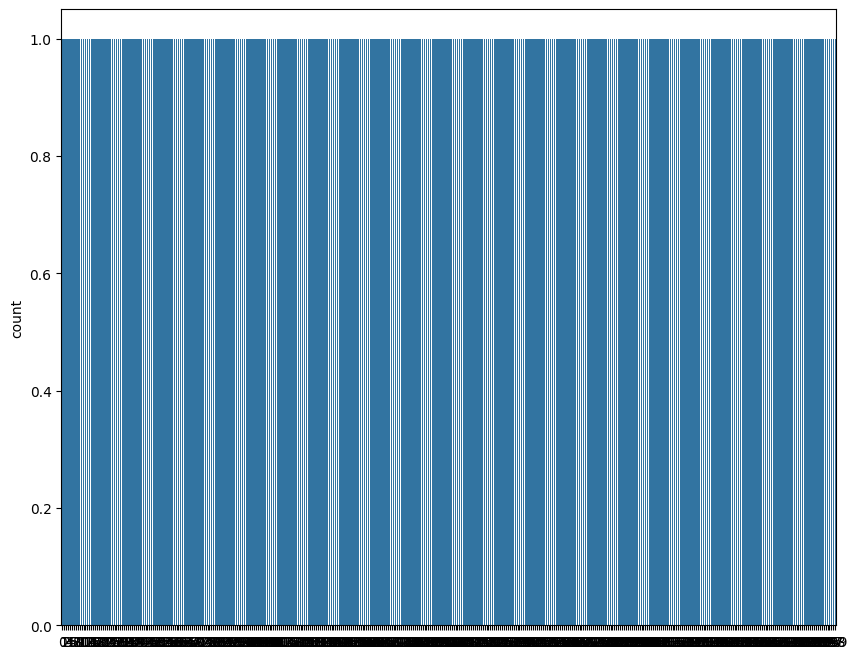

In [64]:
# find count of application
plt.figure(figsize=(10, 8))
sns.countplot(df['Application_Type'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int64         
 2   Application_Type     400 non-null    float64       
 3   Signal_Strength      400 non-null    int64         
 4   Latency              400 non-null    int64         
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 25.1 KB


In [71]:
df1 = df.drop('Timestamp', axis = 1)

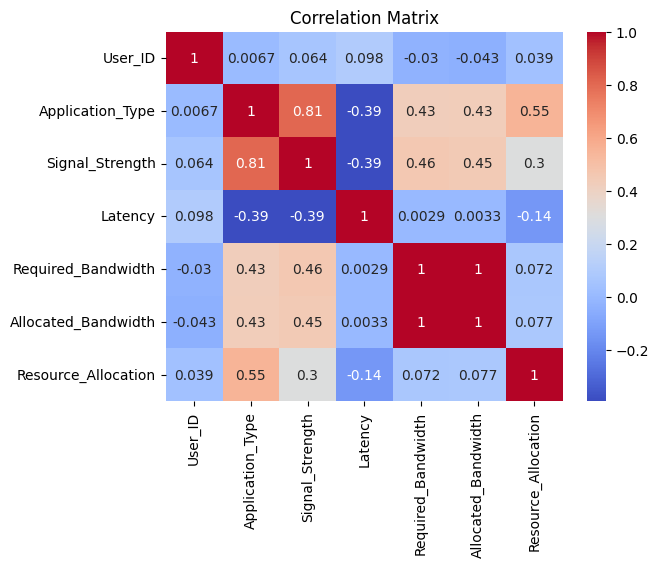

In [72]:
#correlation matrix
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

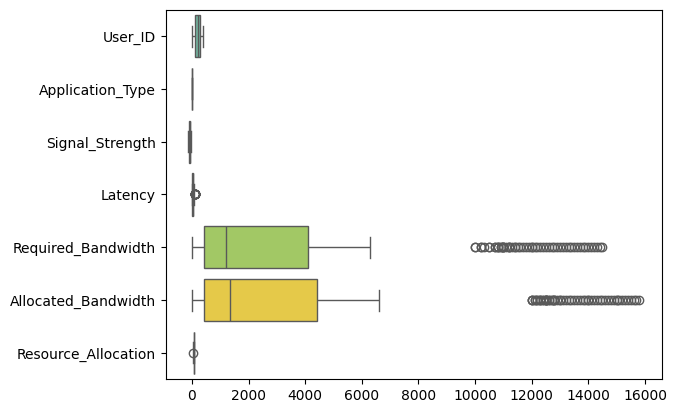

In [73]:
# Finding Outliers

sns.boxplot(data=df, orient="h", palette="Set2")  # Use sns.violinplot() for a violin plot

<Axes: ylabel='Signal_Strength'>

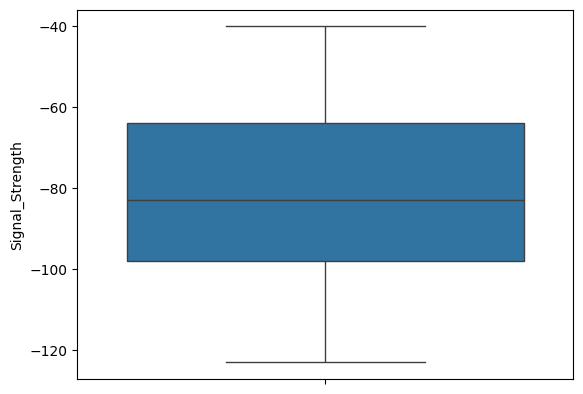

In [74]:
sns.boxplot(data=df['Signal_Strength'])
# No outtliers present

<Axes: ylabel='Latency'>

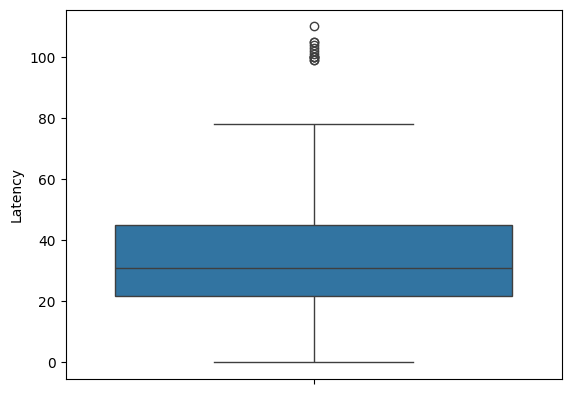

In [76]:
sns.boxplot(data=df['Latency'])
# Outliers present on positive side

In [78]:
# Cannot transform latency data to handle outliers=> Leads to greater number of outliers
# So, Removing outliers from 'Latency'

Q1 = np.percentile(df['Latency'], 25, method='midpoint')
Q3 = np.percentile(df['Latency'], 75, method='midpoint')

IQR = Q3-Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_val = np.where(df['Latency'] >= upper)
lower_val = np.where(df['Latency'] <= lower)

# Removing the outliers
df.drop(upper_val[0], inplace=True)
df.drop(lower_val[0], inplace=True)

<Axes: ylabel='Latency'>

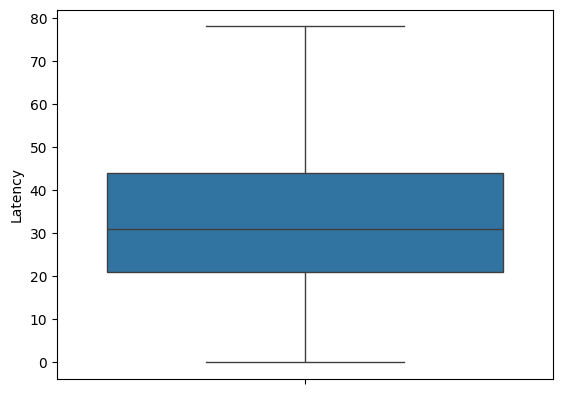

In [79]:
sns.boxplot(data=df['Latency'])
# Outliers gone

In [81]:
df1.shape

(400, 7)

13 rows deleted

In [80]:
df.shape

(387, 8)

<Axes: ylabel='Required_Bandwidth'>

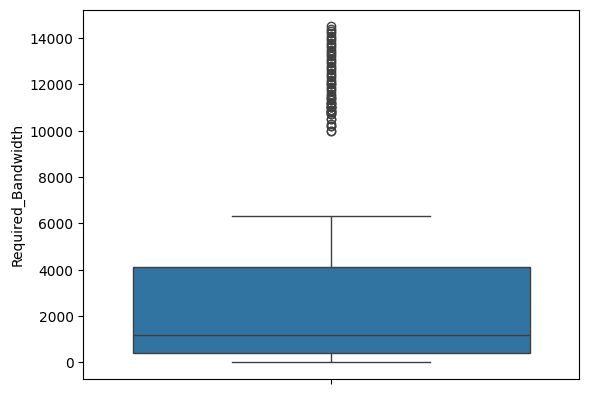

In [77]:
sns.boxplot(data=df['Required_Bandwidth'])
#outiers present

<Axes: ylabel='Required_Bandwidth'>

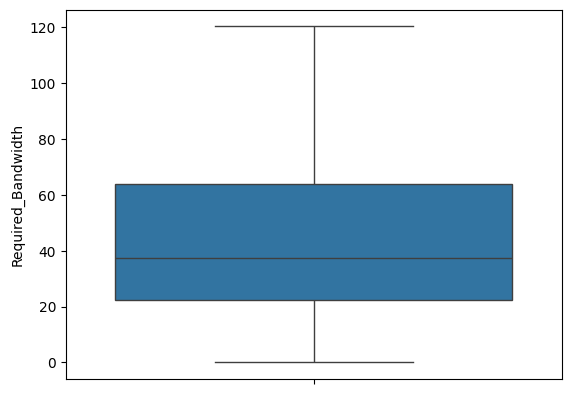

In [82]:
# Can handle outliers in 'Required_Bandwidth', using Transformation
# So, use "Square Root Transformation (np.sqrt())""

df['Required_Bandwidth'] = np.sqrt(df['Required_Bandwidth'])

sns.boxplot(data=df['Required_Bandwidth'])

<Axes: ylabel='Allocated_Bandwidth'>

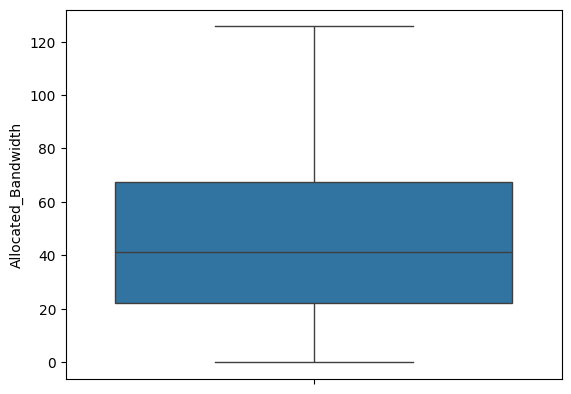

In [83]:
df['Allocated_Bandwidth'] = np.sqrt(df['Allocated_Bandwidth'])

sns.boxplot(data=df['Allocated_Bandwidth'])

<Axes: >

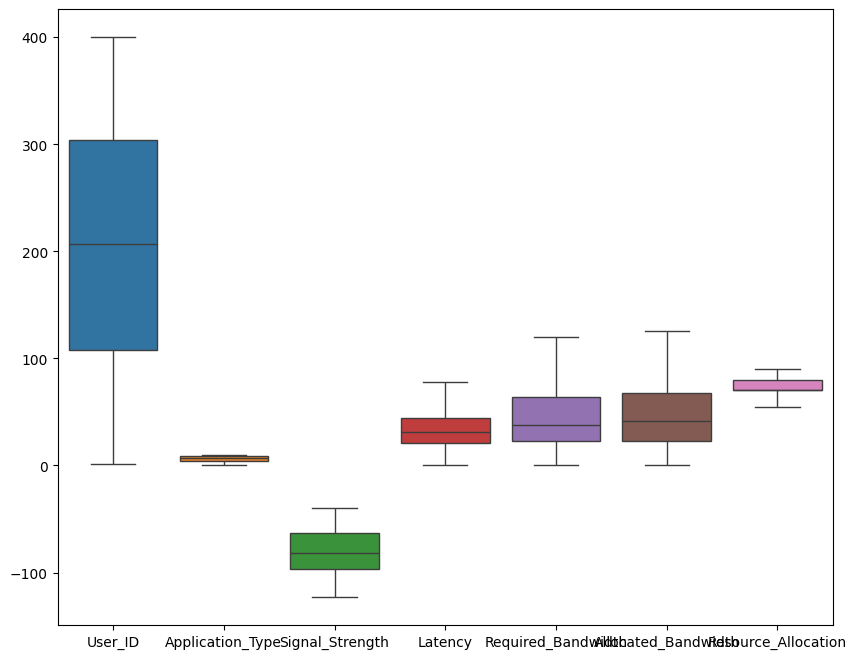

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
# Outliers removed from all the columns
# But data is present over very wide ranges
# So, have to normalize data to one range

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [91]:
df['Signal_Strength'] = scaler.fit_transform(df[['Signal_Strength']])
df['Latency'] = scaler.fit_transform(df[['Latency']])
df['Required_Bandwidth'] = scaler.fit_transform(df[['Required_Bandwidth']])
df['Allocated_Bandwidth'] = scaler.fit_transform(df[['Allocated_Bandwidth']])
df['Resource_Allocation'] = scaler.fit_transform(df[['Resource_Allocation']])
df['Application_Type'] = scaler.fit_transform(df[['Application_Type']])

df.head()

,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,1,0.9,0.578313,0.384615,0.830455,0.974355,0.428571
1,2,0.5,0.518072,0.256410,0.083045,0.087149,0.714286
2,3,0.6,0.457831,0.512821,0.587220,0.616236,0.571429
3,4,1.0,0.638554,0.128205,0.262613,0.308118,1.000000
4,5,0.7,0.542169,0.320513,0.371391,0.435745,0.857143


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              387 non-null    int64  
 1   Application_Type     387 non-null    float64
 2   Signal_Strength      387 non-null    float64
 3   Latency              387 non-null    float64
 4   Required_Bandwidth   387 non-null    float64
 5   Allocated_Bandwidth  387 non-null    float64
 6   Resource_Allocation  387 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 24.2 KB


In [96]:
df = df.drop('User_ID', axis= 1)

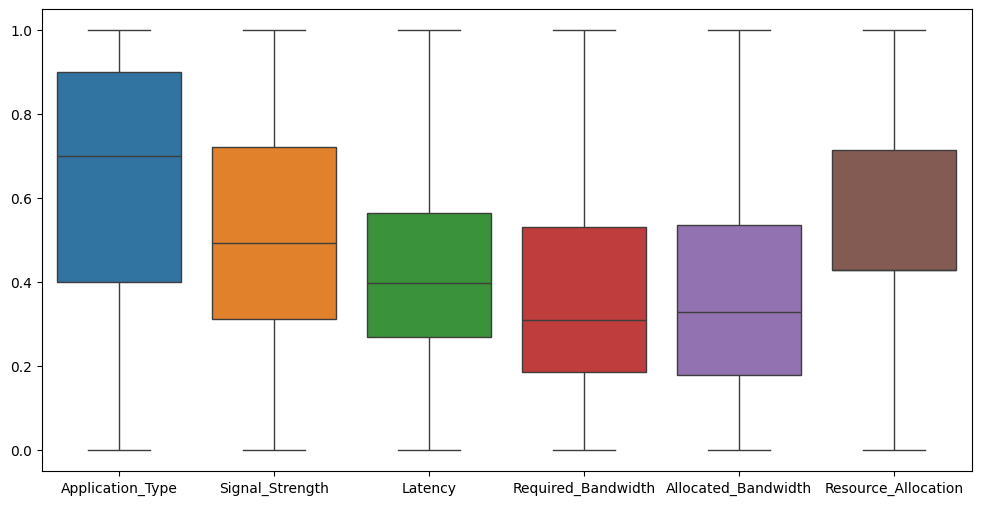

In [97]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()

In [98]:
df.describe()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.568475,0.520096,0.404227,0.386077,0.390511,0.567368
std,0.343765,0.249585,0.221440,0.273194,0.277136,0.257148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.313253,0.269231,0.185695,0.177892,0.428571
50%,0.700000,0.493976,0.397436,0.310728,0.328017,0.428571
75%,0.900000,0.722892,0.564103,0.531751,0.536625,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


train test split

In [100]:
from sklearn.model_selection import train_test_split

In [99]:
X = df.drop('Resource_Allocation', axis=1)
y = df['Resource_Allocation']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
X.shape, X_train.shape, X_test.shape

((387, 5), (309, 5), (78, 5))

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [108]:
lin_regressor_y_pred = lin_regressor.predict(X_test)

In [109]:
lin_regressor_r2 = r2_score(y_test, lin_regressor_y_pred)
lin_regressor_r2

0.32902662447711495

In [110]:
lin_regressor_mse = mean_squared_error(y_test, lin_regressor_y_pred)
lin_regressor_mse

0.04895074381867201

In [111]:
lin_regressor_rmse = np.sqrt(lin_regressor_mse)
lin_regressor_rmse

0.22124814986496952

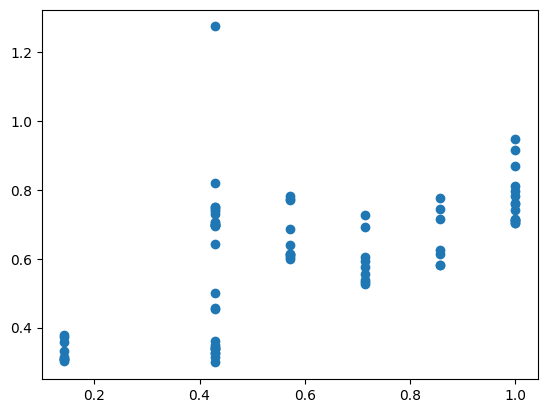

In [112]:
plt.scatter(y_test, lin_regressor_y_pred)
plt.show()

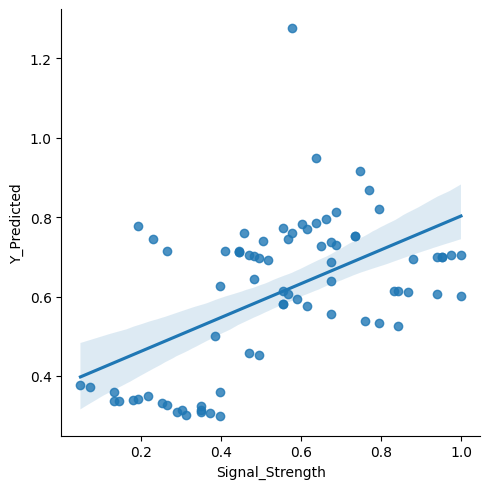

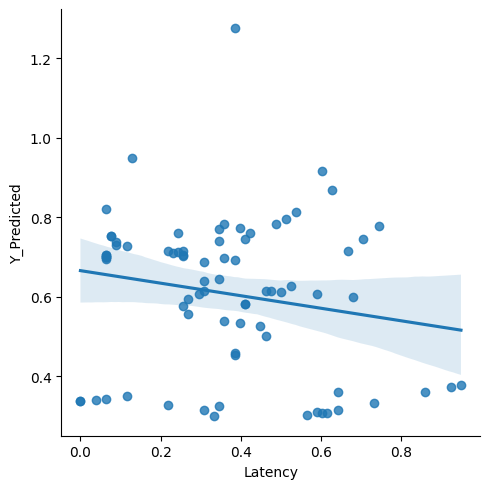

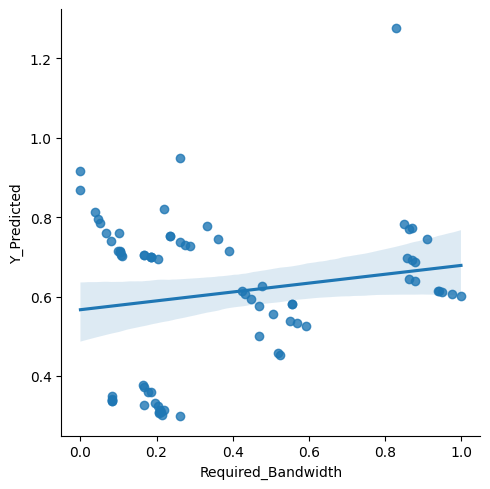

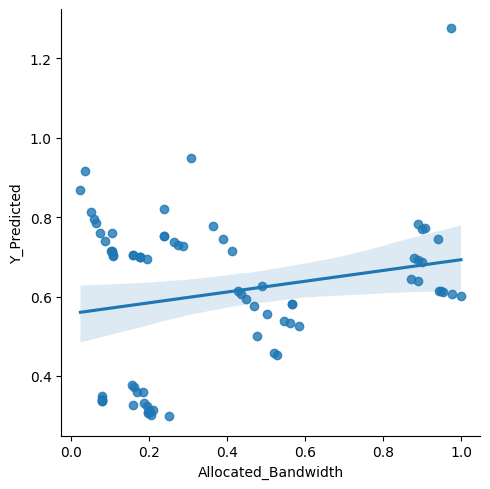

In [113]:
# Scatter Plots of each feature vs predicted value with regression line

lin_regressor_plot = X_test
lin_regressor_plot['Y_Predicted'] = lin_regressor_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.show()

In [115]:
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)

SVR(kernel='poly')

In [119]:
svr_y_pred = svr.predict(X_test)

In [120]:
svr_r2 = r2_score(y_test, svr_y_pred)
svr_r2

0.869474890299873

In [121]:
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mse

0.009522436269331608

In [122]:
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.09758297120569555

In [123]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [124]:
dtree_y_pred = dtree.predict(X_test)

In [125]:
dtree_r2 = r2_score(y_test, dtree_y_pred)
dtree_r2

0.7704722056186492

In [126]:
dtree_mse = mean_squared_error(y_test, dtree_y_pred)
dtree_mse

0.016745159602302457

In [127]:
dtree_rmse = np.sqrt(dtree_mse)
dtree_rmse

0.12940308961652522

In [128]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [129]:
rf_y_pred = rf.predict(X_test)

In [131]:
rf_r2 = r2_score(y_test, rf_y_pred)
rf_r2

0.8228777047220561

In [132]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mse

0.012921925693354267

In [133]:
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.11367464841975218

               Model  R-squared       MSE      RMSE
0  Linear Regression   0.329027  0.048951  0.221248
1                SVR   0.869475  0.009522  0.097583
2      Decision Tree   0.770472  0.016745  0.129403
3      Random Forest   0.822878  0.012922  0.113675


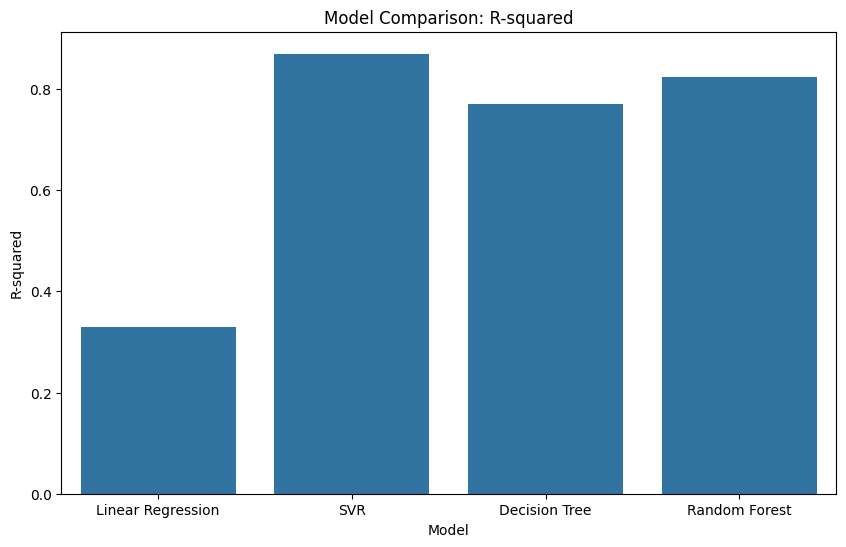

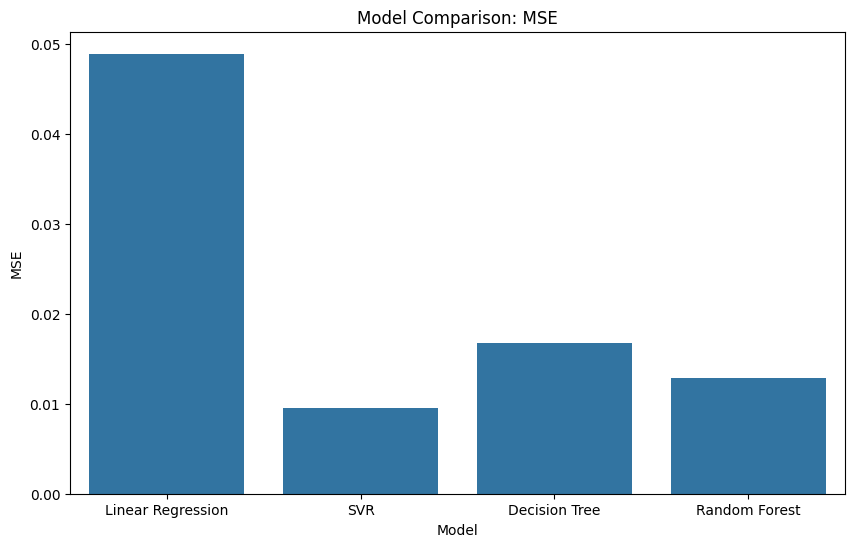

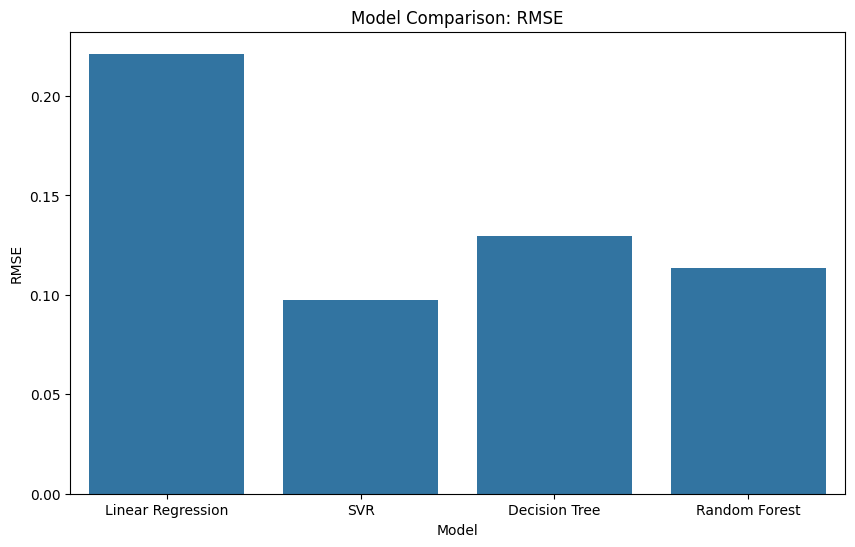

In [135]:
# Create a DataFrame to store the model results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest'],
    'R-squared': [lin_regressor_r2, svr_r2, dtree_r2, rf_r2],
    'MSE': [lin_regressor_mse, svr_mse, dtree_mse, rf_mse],
    'RMSE': [lin_regressor_rmse, svr_rmse, dtree_rmse, rf_rmse]
})

# Display the results
print(results_df)

# Plotting the results for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('Model Comparison: R-squared')
plt.show()

# Plotting the results for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Model Comparison: MSE')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Model Comparison: RMSE')
plt.show()

SVR is best

Neural network

In [136]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [137]:
import tensorflow as tf

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [142]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

In [143]:
# Initialising the ANN
classifier = Sequential()

In [144]:
X_train.shape

(309, 5)

In [145]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=5,activation='relu'))

In [146]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [147]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='lin'))

In [148]:
classifier.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])


In [149]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1940 - mae: 0.3690 - mse: 0.1940 - val_loss: 0.1583 - val_mae: 0.3088 - val_mse: 0.1583
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1509 - mae: 0.3180 - mse: 0.1509 - val_loss: 0.1199 - val_mae: 0.2462 - val_mse: 0.1199
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1103 - mae: 0.2524 - mse: 0.1103 - val_loss: 0.0961 - val_mae: 0.2298 - val_mse: 0.0961
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0811 - mae: 0.2258 - mse: 0.0811 - val_loss: 0.0839 - val_mae: 0.2266 - val_mse: 0.0839
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0776 - mae: 0.2226 - mse: 0.0776 - val_loss: 0.0791 - val_mae: 0.2276 - val_mse: 0.0791
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0711 - mae: 0.2125 - mse: 0.0711 - val_loss: 0.0779 - val_mae: 0.2289 - val_mse: 0.0779
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0663 - mae: 0.2110 - mse: 0.0663 - val_loss: 0.0777

In [150]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


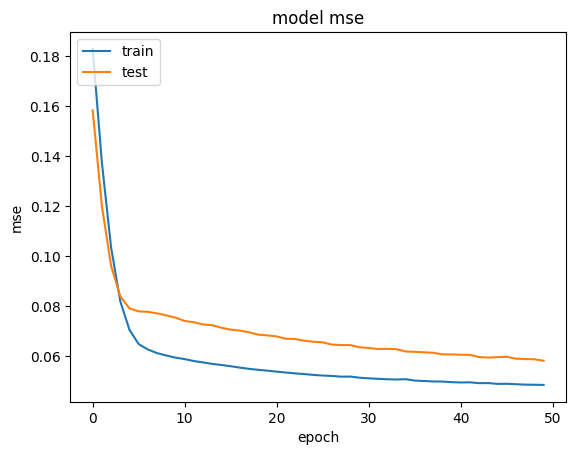

In [151]:

# summarize history for accuracy
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()